In [1]:
import sys
import os
import numpy as np
import difflib
import matplotlib.pyplot as plt
import glob
from tifffile import imsave
from tifffile import imread, imwrite
import napari
from Utils.helpers import Prob_to_Binary, zero_pad_color, multiplot,WingArea, multiplotline
import tifffile
from pathlib import Path

In [2]:
Masterdir =  '/media/sancere/Images_For_FAQT/UnRotated/'


LeftName = 'L'
RightName = 'R'

MaskResults = Masterdir + '/MaskResults/'

AsymmetryResults = Masterdir + '/AsymmetryResults/'
AsymmetryResultsName = 'Asymmetry'
OverlayResults = MaskResults + '/Overlays/'


In [3]:
Raw_path = os.path.join(Masterdir, '*tif')
Left_path = os.path.join(MaskResults, '*tif')
filesRaw = glob.glob(Raw_path)
filesRaw.sort
filesLeft = glob.glob(Left_path)
filesLeft.sort
for secondname in filesLeft:
    image = imread(secondname)
    if len(image.shape) == 3:
       image = image[:,:,0]
    Name = os.path.basename(os.path.splitext(secondname)[0])
    imwrite((MaskResults + Name + '.tif' ) , image.astype('uint16'))

In [4]:


axes = 'YX'
saveaxes = 'YX'
Path(OverlayResults).mkdir(exist_ok = True)
RawImages = []
LeftImages = []
Name = []
for fname in filesRaw:
  for secondname in filesLeft:
    if os.path.basename(os.path.splitext(secondname)[0]) == 'Mask' + os.path.basename(os.path.splitext(fname)[0]):
            image = imread(fname)
            
            Leftimage = imread(secondname)
            RawImages.append(image)
            LeftImages.append(Leftimage.astype('uint16'))
            Name.append(os.path.basename(os.path.splitext(fname)[0]))
          
with napari.gui_qt():
   
    # initialise viewer with Left wing image
    viewer = napari.view_image(np.asarray(RawImages), name='Wings', rgb=True)

    # add the labels
    label_layer = viewer.add_labels(np.asarray(LeftImages), name='segmentation')  
    

    
ModifiedArray = viewer.layers['segmentation'].data 

for i in range(0, ModifiedArray.shape[0]):
     imwrite((MaskResults + 'Mask' + Name[i] + '.tif' ) , ModifiedArray[i].astype('uint8'))
     
                

In [5]:
import pandas as pd
Path(AsymmetryResults).mkdir(exist_ok = True)
Raw_pathRight = os.path.join(MaskResults, '*tif')
Raw_pathLeft = os.path.join(MaskResults, '*tif')

filesRawRight = glob.glob(Raw_pathRight)
filesRawLeft = glob.glob(Raw_pathLeft)


AllRightArea = []
AllLeftArea = []
AllRightMinusLeftArea = []
AllRightPlusLeftArea = []
AllAssymetery = []
AllName = []
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
for fnameRight in filesRawRight:
    
   NameRight = os.path.basename(os.path.splitext(fnameRight)[0]) 
   imageRight = imread(fnameRight)
   for fnameLeft in filesRawLeft:
       NameLeft = os.path.basename(os.path.splitext(fnameLeft)[0]) 
       imageLeft = imread(fnameLeft) 
       
       ChangeName = difflib.ndiff(NameLeft, NameRight)
       delta = ''.join(x[0:] for x in ChangeName if x.startswith('- '))
      
       #ChangeName = NameRight.replace(RightName, LeftName) 
       if delta == '- L':
           print(NameLeft, NameRight)
           RightArea, LeftArea, RightMinusLeft, RightPlusLeft, Assymetery = WingArea(imageLeft, imageRight)
         
           AllName.append(NameLeft)
           AllRightArea.append(RightArea)
           AllLeftArea.append(LeftArea)
           AllRightMinusLeftArea.append(RightMinusLeft)
           AllRightPlusLeftArea.append(RightPlusLeft)
           AllAssymetery.append(Assymetery)
            
df = pd.DataFrame(list(zip(AllRightArea,AllLeftArea,AllRightMinusLeftArea,AllRightPlusLeftArea,AllAssymetery)), index =AllName, 
                                              columns =['RightArea', 'LeftArea', 'Right-Left', 'Right+Left', 'Assymmetery'])

df.to_csv(AsymmetryResults + '/' + AsymmetryResultsName +  '.csv')  
df

Masknub.KO.KO_L00 Masknub.KO.KO_R00
Masknub.KO.KO_L01 Masknub.KO.KO_R01
Masknub.KO.KO_L02 Masknub.KO.KO_R02
Masknub.KO.KO_L03 Masknub.KO.KO_R03
Masknub.KO.KO_L04 Masknub.KO.KO_R04
Masknub.KO.KO_L05 Masknub.KO.KO_R05
Masknub.KO.KO_L06 Masknub.KO.KO_R06
Masknub.KO.KO_L07 Masknub.KO.KO_R07
Masknub.KO.KO_L08 Masknub.KO.KO_R08
Masknub.KO.KO_L09 Masknub.KO.KO_R09
Masknub.KO.KO_L10 Masknub.KO.KO_R10
Masknub.KO.KO_L11 Masknub.KO.KO_R11
Masknub.KO.KO_L12 Masknub.KO.KO_R12
Masknub.KO.KO_L13 Masknub.KO.KO_R13
Masknub.KO.KO_L14 Masknub.KO.KO_R14
Masknub.KO.KO_L15 Masknub.KO.KO_R15
Masknub.KO.KO_L16 Masknub.KO.KO_R16
Masknub.KO.KO_L17 Masknub.KO.KO_R17
Masknub.KO.KO_L18 Masknub.KO.KO_R18
Masknub.KO.KO_L19 Masknub.KO.KO_R19
Masknub.KO.KO_L20 Masknub.KO.KO_R20
Masknub.KO.KO_L21 Masknub.KO.KO_R21
Masknub.KO.KO_L22 Masknub.KO.KO_R22
Masknub.KO.KO_L23 Masknub.KO.KO_R23
Masknub.KO.KO_L24 Masknub.KO.KO_R24
Masknub.KO.KO_L25 Masknub.KO.KO_R25
Masknub.KO.KO_L26 Masknub.KO.KO_R26
Masknub.KO.KO_L27 Masknub.KO

,RightArea,LeftArea,Right-Left,Right+Left,Assymmetery
Masknub.KO.KO_L00,230479,231452,-973,461931,-0.004213
Masknub.KO.KO_L01,213333,214402,-1069,427735,-0.004998
Masknub.KO.KO_L02,238824,239925,-1101,478749,-0.004599
Masknub.KO.KO_L03,223083,226286,-3203,449369,-0.014256
Masknub.KO.KO_L04,236803,240537,-3734,477340,-0.015645
Masknub.KO.KO_L05,203395,203241,154,406636,0.000757
Masknub.KO.KO_L06,239846,243852,-4006,483698,-0.016564
Masknub.KO.KO_L07,224666,222996,1670,447662,0.007461
Masknub.KO.KO_L08,249507,253333,-3826,502840,-0.015218
Masknub.KO.KO_L09,215802,220318,-4516,436120,-0.020710


In [6]:
positivecount = np.sum(df['Assymmetery']>0)
negativecount = np.sum(df['Assymmetery']<0)   
print('Positive Count' , positivecount)
print('Negative Count' , negativecount)

Positive Count 23
Negative Count 40


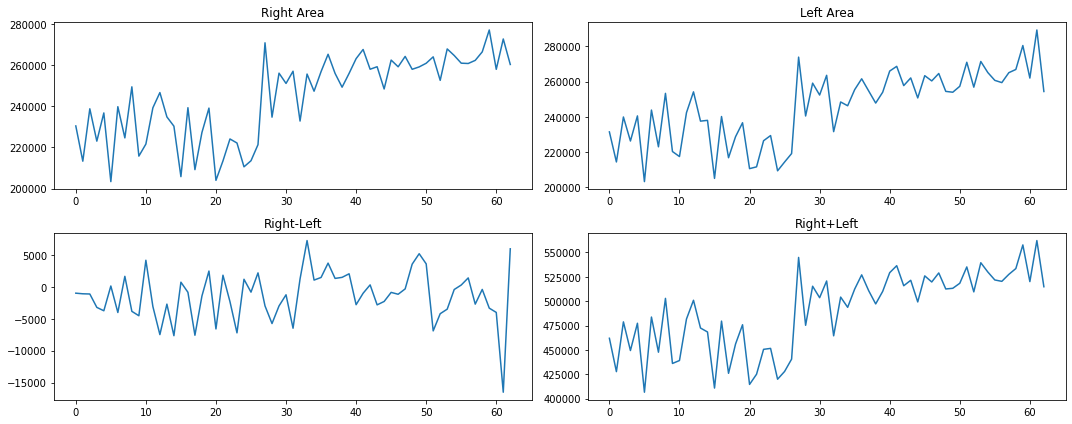

In [7]:
multiplotline(AllRightArea, AllLeftArea, AllRightMinusLeftArea, AllRightPlusLeftArea, 'Right Area', 'Left Area', 'Right-Left', 'Right+Left', targetdir = AsymmetryResults, File = '', plotTitle = 'Asymmetry')


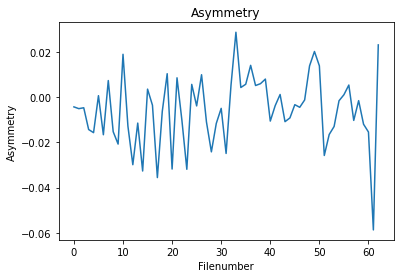

In [8]:
plt.plot(AllAssymetery)
plt.title("Asymmetry")
plt.ylabel("Asymmetry")
plt.xlabel("Filenumber")
plt.show()